In [1]:
pip install gensim


In [2]:
import gensim
from gensim import corpora, models
import matplotlib.pyplot as plt
import os


In [4]:
corpus = corpora.BleiCorpus('ap.dat', 'vocab.txt')


In [5]:
model = models.ldamodel.LdaModel(corpus, id2word=corpus.id2word, num_topics=10, alpha='symmetric', passes=10)


In [6]:
doc = corpus.docbyoffset(0)
topics = model[doc]
print("Темы для первого документа:", topics)


Темы для первого документа: [(0, 0.23025994), (6, 0.545369), (7, 0.18033154), (8, 0.041762866)]


In [7]:
print("Темы с ключевыми словами:")
for idx, topic in model.print_topics(num_topics=10, num_words=10):
    print(f"Тема {idx}: {topic}")


Темы с ключевыми словами:
Тема 0: 0.008*"i" + 0.008*"mecham" + 0.006*"macmillan" + 0.006*"french" + 0.005*"maxwell" + 0.005*"school" + 0.005*"years" + 0.005*"board" + 0.004*"north" + 0.004*"first"
Тема 1: 0.013*"court" + 0.012*"case" + 0.011*"federal" + 0.010*"attorney" + 0.009*"government" + 0.009*"judge" + 0.006*"trial" + 0.006*"documents" + 0.006*"charges" + 0.005*"district"
Тема 2: 0.011*"people" + 0.009*"water" + 0.008*"county" + 0.008*"fire" + 0.007*"state" + 0.007*"ohio" + 0.007*"national" + 0.006*"area" + 0.006*"miles" + 0.006*"department"
Тема 3: 0.017*"i" + 0.013*"bush" + 0.012*"president" + 0.006*"house" + 0.006*"south" + 0.006*"administration" + 0.005*"senate" + 0.005*"committee" + 0.005*"bill" + 0.005*"congress"
Тема 4: 0.027*"percent" + 0.009*"dukakis" + 0.009*"new" + 0.009*"year" + 0.007*"campaign" + 0.007*"billion" + 0.007*"poll" + 0.006*"bush" + 0.006*"vote" + 0.005*"voters"
Тема 5: 0.010*"percent" + 0.009*"trade" + 0.009*"united" + 0.009*"market" + 0.009*"states" + 0.

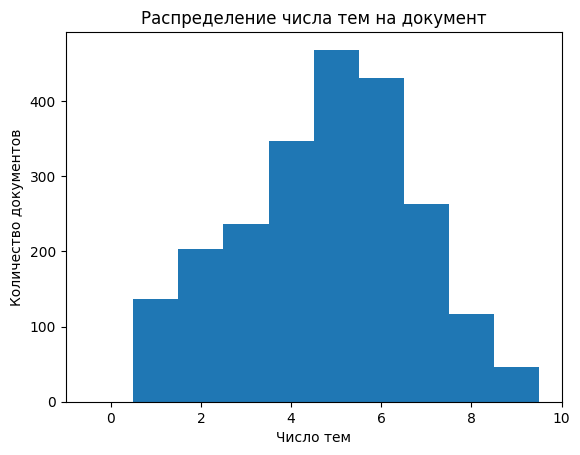

In [8]:
num_topics_used = [len(model[doc]) for doc in corpus]
plt.hist(num_topics_used, bins=range(max(num_topics_used)+1), align='left')
plt.title("Распределение числа тем на документ")
plt.xlabel("Число тем")
plt.ylabel("Количество документов")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


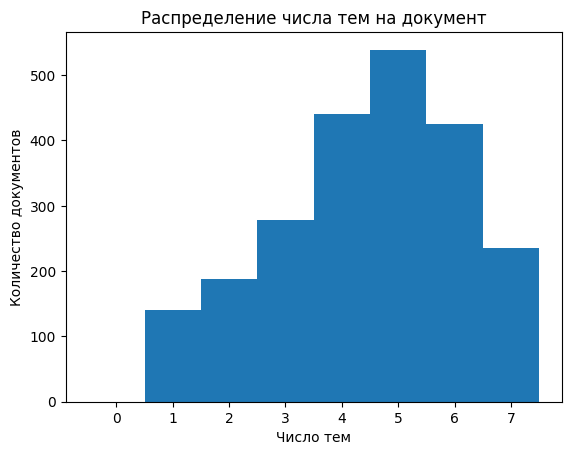

In [37]:
corpus = corpora.BleiCorpus('ap.dat', 'vocab.txt')
model = models.ldamodel.LdaModel(corpus, id2word=corpus.id2word, num_topics=8, alpha='asymmetric', passes=10)
num_topics_used = [len(model[doc]) for doc in corpus]
plt.hist(num_topics_used, bins=range(max(num_topics_used)+1), align='left')
plt.title("Распределение числа тем на документ")
plt.xlabel("Число тем")
plt.ylabel("Количество документов")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


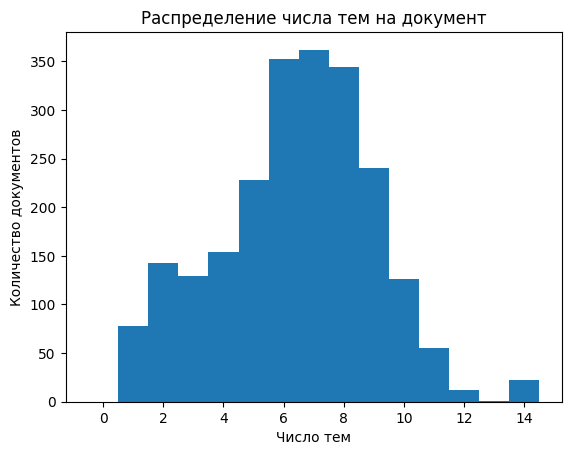

In [43]:
corpus = corpora.BleiCorpus('ap.dat', 'vocab.txt')
model = models.ldamodel.LdaModel(corpus, id2word=corpus.id2word, num_topics=15, alpha=0.1, passes=15)
num_topics_used = [len(model[doc]) for doc in corpus]
plt.hist(num_topics_used, bins=range(max(num_topics_used)+1), align='left')
plt.title("Распределение числа тем на документ")
plt.xlabel("Число тем")
plt.ylabel("Количество документов")
plt.show()

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [15]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t not in stop_words and t not in string.punctuation]
    tokens = [stemmer.stem(t) for t in tokens]
    return tokens

# Пример обработки текста
with open('ap.txt', 'r') as file:
    processed_texts = [preprocess(line) for line in file.readlines()]


In [17]:
from gensim.corpora import Dictionary

dictionary = Dictionary(processed_texts)
dictionary.save_as_text('vocab_preprocessed.txt')

corpus = [dictionary.doc2bow(text) for text in processed_texts]
corpora.BleiCorpus.serialize('ap_preprocessed.dat', corpus)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


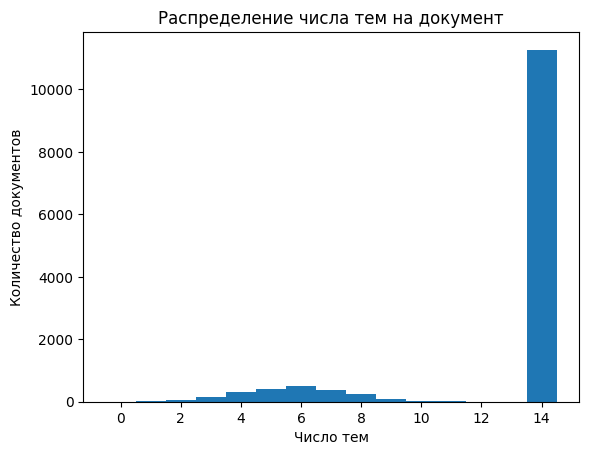

In [44]:
corpus = corpora.BleiCorpus('ap_preprocessed.dat', 'vocab_preprocessed.txt')
model = models.ldamodel.LdaModel(corpus, id2word=corpus.id2word, num_topics=15, alpha=0.1, passes=15)
num_topics_used = [len(model[doc]) for doc in corpus]
plt.hist(num_topics_used, bins=range(max(num_topics_used)+1), align='left')
plt.title("Распределение числа тем на документ")
plt.xlabel("Число тем")
plt.ylabel("Количество документов")
plt.show()

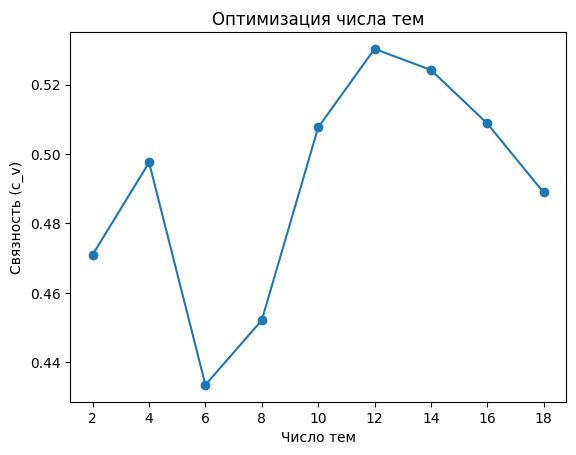

In [18]:
from gensim.models import CoherenceModel

def evaluate_coherence(corpus, dictionary, texts, start=2, stop=20, step=2):
    coherence_scores = []
    for num_topics in range(start, stop, step):
        model = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, passes=10)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_scores.append((num_topics, coherencemodel.get_coherence()))
    return coherence_scores

scores = evaluate_coherence(corpus, dictionary, processed_texts)
x, y = zip(*scores)
plt.plot(x, y, marker='o')
plt.title("Оптимизация числа тем")
plt.xlabel("Число тем")
plt.ylabel("Связность (c_v)")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


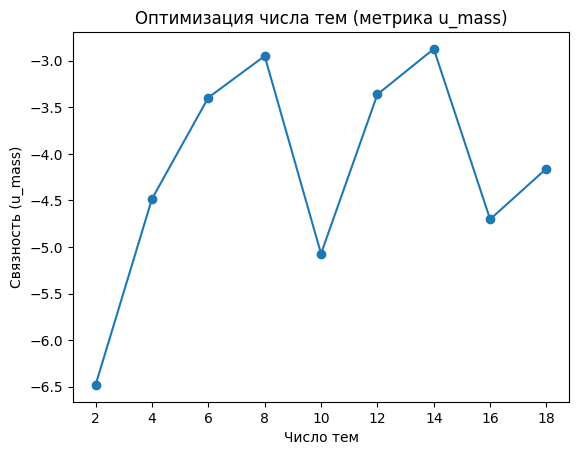

In [40]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

def evaluate_coherence_umass(corpus, dictionary, texts, start=2, stop=20, step=2):
    coherence_scores = []
    for num_topics in range(start, stop, step):
        # Создание модели LDA
        model = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, passes=10)

        # Создание CoherenceModel с метрикой u_mass
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')

        # Сохранение значений связности
        coherence_scores.append((num_topics, coherencemodel.get_coherence()))

    return coherence_scores

# Пример использования функции
scores = evaluate_coherence_umass(corpus, dictionary, processed_texts)

# График изменения связности в зависимости от числа тем
x, y = zip(*scores)
plt.plot(x, y, marker='o')
plt.title("Оптимизация числа тем (метрика u_mass)")
plt.xlabel("Число тем")
plt.ylabel("Связность (u_mass)")
plt.show()

In [19]:
pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 28.4 MB/s eta 0:00:00


In [24]:
print(len(dictionary))

34109


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
print(model.num_topics)
print(len(model.id2word))


10
10473


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
from gensim.corpora import Dictionary
from gensim import corpora

# Создаем словарь из обработанных текстов
dictionary = Dictionary(processed_texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)  # Убираем редкие и слишком частые слова

# Сохраняем словарь
dictionary.save_as_text('vocab_preprocessed.txt')

# Создаем корпус
corpus = [dictionary.doc2bow(text) for text in processed_texts]
corpora.BleiCorpus.serialize('ap_preprocessed.dat', corpus)
from gensim.corpora import BleiCorpus

corpus = BleiCorpus('ap_preprocessed.dat', 'vocab_preprocessed.txt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
from gensim.models import LdaModel

model = LdaModel(corpus, id2word=dictionary, num_topics=10, passes=10, per_word_topics=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

lda_vis = gensimvis.prepare(model, corpus, dictionary)
pyLDAvis.save_html(lda_vis, 'lda_visualization.html')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


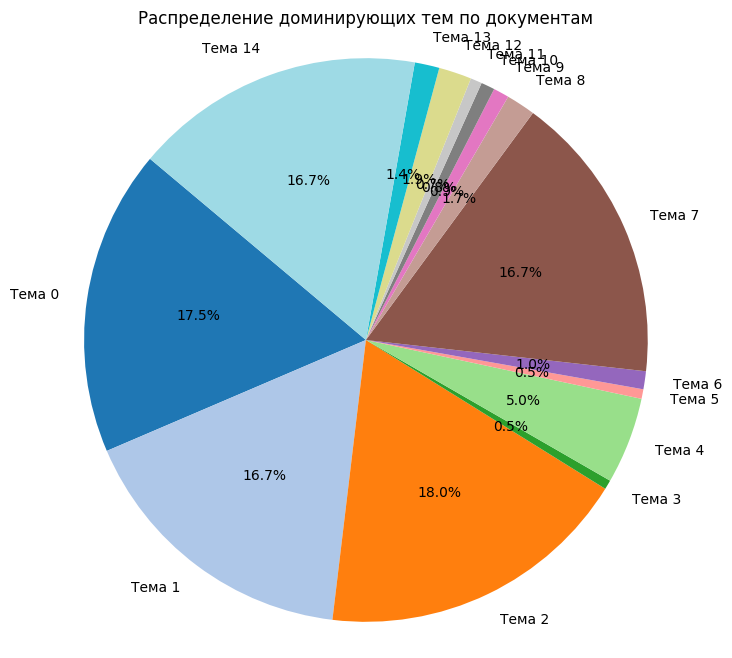

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Получаем доминирующую тему для каждого документа
dominant_topics = [max(model[doc], key=lambda x: x[1])[0] for doc in corpus]

# Считаем, сколько документов относится к каждой теме
topic_counts = Counter(dominant_topics)

# Метки и значения для диаграммы
labels = [f"Тема {i}" for i in range(len(topic_counts))]
sizes = [topic_counts[i] for i in range(len(topic_counts))]

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20(np.linspace(0, 1, len(topic_counts)))
)
plt.title("Распределение доминирующих тем по документам")
plt.axis('equal')  # Убедимся, что круг остается кругом
plt.show()
